## AMEX EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import gc
import seaborn as sns

sns.set_style("darkgrid")

### Read Train Labels

In [4]:
train_labels = pd.read_csv('train_labels/train_labels.csv')
#check for missing values
train_labels.isna().any().any()
#check for duplicate values
train_labels.customer_ID.duplicated().any()

340085
118828


In [5]:
#number of non default records
num_non_default_records = (train_labels['target'] == 0).sum()
print(num_non_default_records)
#number of default records
num_default_records = (train_labels['target'] == 1).sum()
print(num_default_records)

340085
118828


### Load Data

In [6]:
X_df = pd.read_parquet("archive/train.parquet")
X_df.replace(-1, np.nan, inplace=True)
X_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0,0.008724,1.006838,0.009228,0.124035,0.0,0.004709,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.000610,0.0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0,0.004923,1.000653,0.006151,0.126750,0.0,0.002714,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.005492,0.0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,3,0.021655,1.009672,0.006815,0.123977,0.0,0.009423,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.006986,0.0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0,0.013683,1.002700,0.001373,0.117169,0.0,0.005531,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.006527,0.0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0,0.015193,1.000727,0.007605,0.117325,0.0,0.009312,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.008126,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979333,14,0.020818,0.828199,0.003487,0.090743,0.0,0.025139,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.001498,0.0
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,10,0.007209,0.812610,0.005904,0.079886,0.0,0.023691,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.008225,0.0
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,15,0.013151,0.815422,0.003457,0.100503,0.0,0.012343,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.006773,0.0
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,15,0.009855,1.003541,0.005117,0.101802,0.0,0.008578,...,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.001168,0.0


### Number of Missing Values per Column
- Many columns have null records.

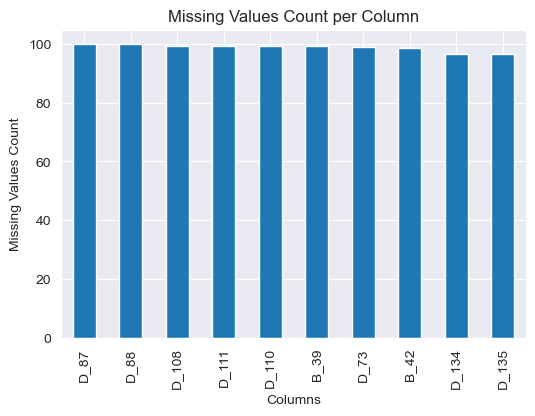

In [7]:
columns_with_missing_values = X_df.columns[X_df.isna().any()].tolist()

#print(columns_with_missing_values)
missing_values_fraction = X_df.isna().sum() * 100 / X_df.shape[0]

# Create a bar plot to visualize the missing values count
plt.figure(figsize=(6, 4))
missing_values_fraction.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.show()